In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation

In [19]:
  # generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(50,50),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(50,50),
    shuffle=True
)


Found 10000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [20]:
def preprocessing(image, label):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(preprocessing)
validation_ds = validation_ds.map(preprocessing)


In [21]:
# LENET CNN architecture with batch normalization and dropout layer to reduce overfitting
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='same',activation='tanh',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 6)         156       
                                                                 
 batch_normalization_4 (Batc  (None, 50, 50, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_4 (Averag  (None, 25, 25, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2416      
                                                                 
 batch_normalization_5 (Batc  (None, 21, 21, 16)       64        
 hNormalization)                                                 
                                                      

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
313/313 [==============================] - 8s 11ms/step - loss: 0.3203 - accuracy: 0.8885 - val_loss: 0.1368 - val_accuracy: 0.9480
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.0754 - val_accuracy: 0.9755
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 3.3766e-04 - val_accuracy: 1.0000
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.6474 - val_accuracy: 0.8795
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0778 - val_accuracy: 0.9760
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 2.3975e-04 - val_accuracy: 1.0000
Epoch 7/20
313/313 [==============================] - 4s 11ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 3.4129e-04 - val_accu

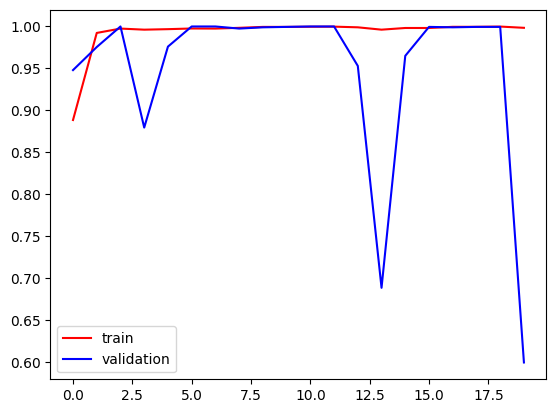

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

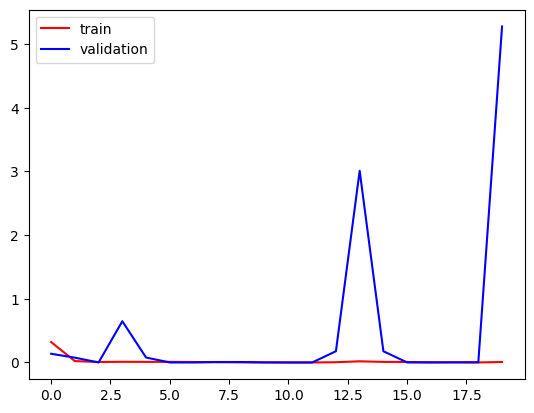

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
# from tensorflow.keras.models import load_model
# model.save('/content/drive/MyDrive/Infoware/symbol_recognition.h5')

In [4]:
from tensorflow.keras.models import load_model,save_model
newModel=load_model('models/symbol_recognition.h5')

In [10]:
import cv2
img_list=[]
for i in range(10):
  img=cv2.imread(f'images/drawn{i}.png')
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50, 50))
  img = img.reshape((1,50,50,1))
  img_list.append(img)

In [11]:
for i in range(10):
  print(f'drawn{i}= ',newModel.predict(img_list[i]).argmax(axis=1))

1/1 [==============================] - 0s 63ms/step
drawn0=  [8]
1/1 [==============================] - 0s 47ms/step
drawn1=  [0]
1/1 [==============================] - 0s 53ms/step
drawn2=  [1]
1/1 [==============================] - 0s 55ms/step
drawn3=  [2]
1/1 [==============================] - 0s 48ms/step
drawn4=  [3]
1/1 [==============================] - 0s 48ms/step
drawn5=  [4]
1/1 [==============================] - 0s 56ms/step
drawn6=  [7]
1/1 [==============================] - 0s 51ms/step
drawn7=  [5]
1/1 [==============================] - 0s 48ms/step
drawn8=  [8]
1/1 [==============================] - 0s 40ms/step
drawn9=  [9]


In [37]:
len(img_list[4][0])

50